# Lab 4: Working with "real" data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
# importing the file
hf = h5py.File('../gammaray_lab4.h5', 'r')

Within hdf5 files you can store different kinds of data sets. Ours is simple and has one called 'data'. You can look at the header and see this using

In [3]:
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
# import the data into an array variable using the get method
# data = np.array(hf.get('data'))

In [5]:
# we close the file using
# hf.close()

## Problem 1

We are lookign at data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 millisecounds, and is in an apporx. 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

In [6]:
# import the data into an array variable using the get method
data = np.array(hf.get('data'))

In [7]:
times = data[0, :]
solar_phase = data[1, :]
longitude = data[2, :]
particle_count = data[3, :]

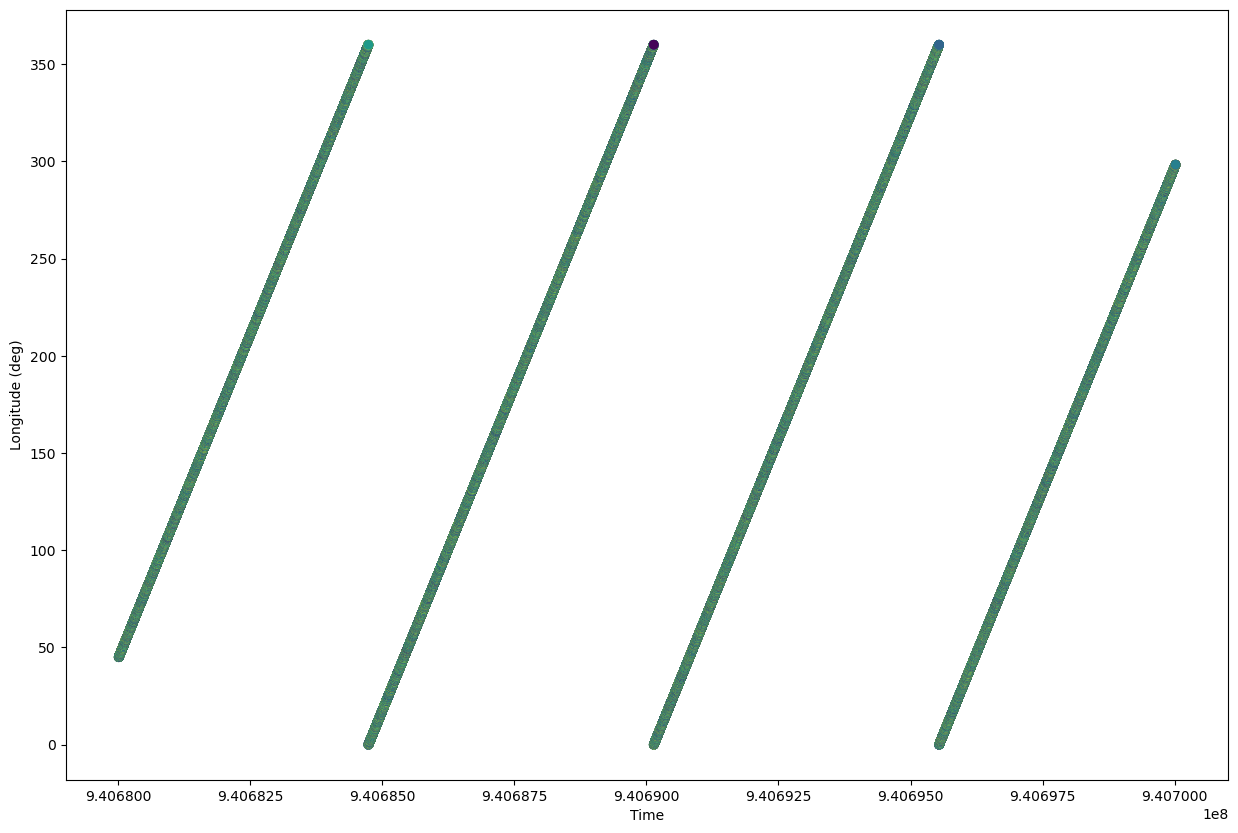

In [8]:
colors = np.random.rand(len(times[0:200000]))
plt.scatter(times[0:200000], longitude[0:200000], c=colors)
plt.xlabel('Time')
plt.ylabel('Longitude (deg)')
plt.show()

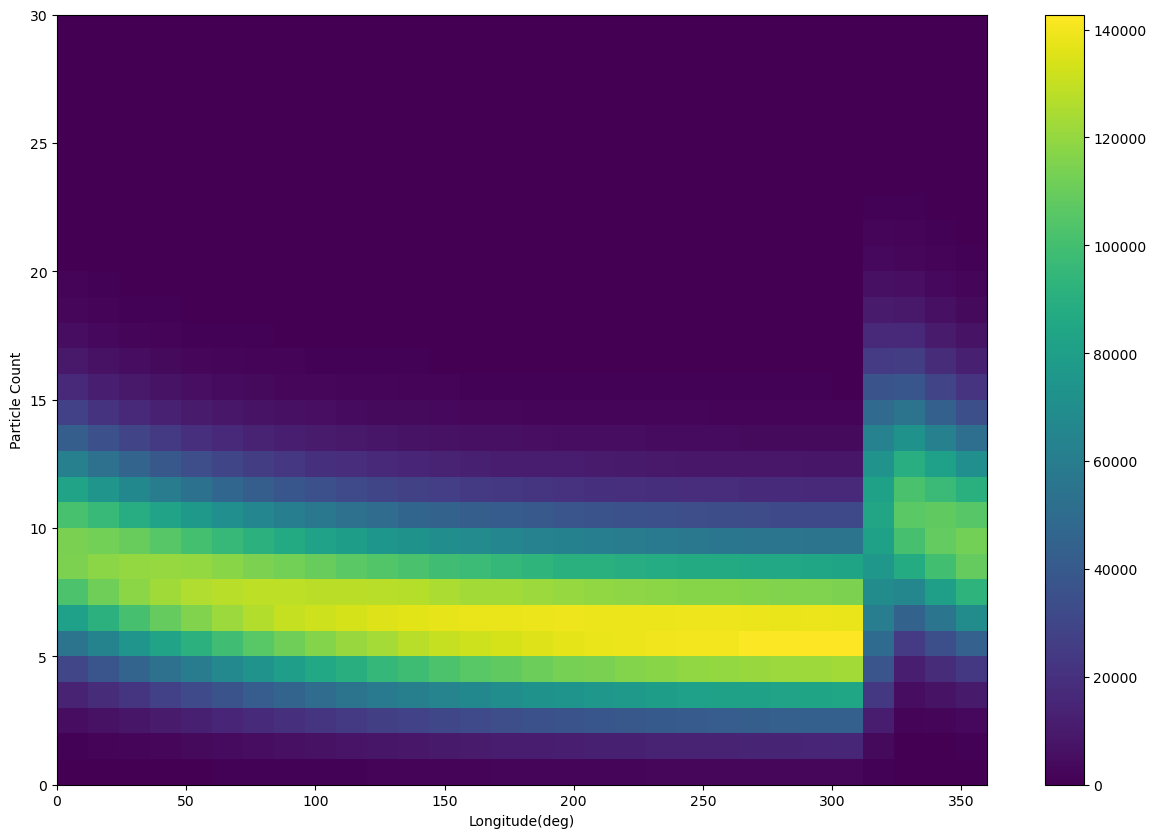

In [9]:
plt.hist2d(longitude, particle_count, bins=30)
plt.colorbar()
plt.xlabel('Longitude(deg)')
plt.ylabel('Particle Count')
plt.show()

a) Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

Looking at the plot of the longitude vs particle count 2D plot, there seems to be some kind of phase shift. On the Longitude axis (between 300 and 360 degrees), all those data points seem to belong somewhere else, like the left side. So, to build my background pdf(), I would have to somehow shift that part of the data to the left. That is I must cut off my data somewhere between 300 and 360 degrees in the logitude axis, move the left hand size over by 360-(the cut off point) and stitch the data I've cutt off to be from 0 degrees to the cut size.

4319520


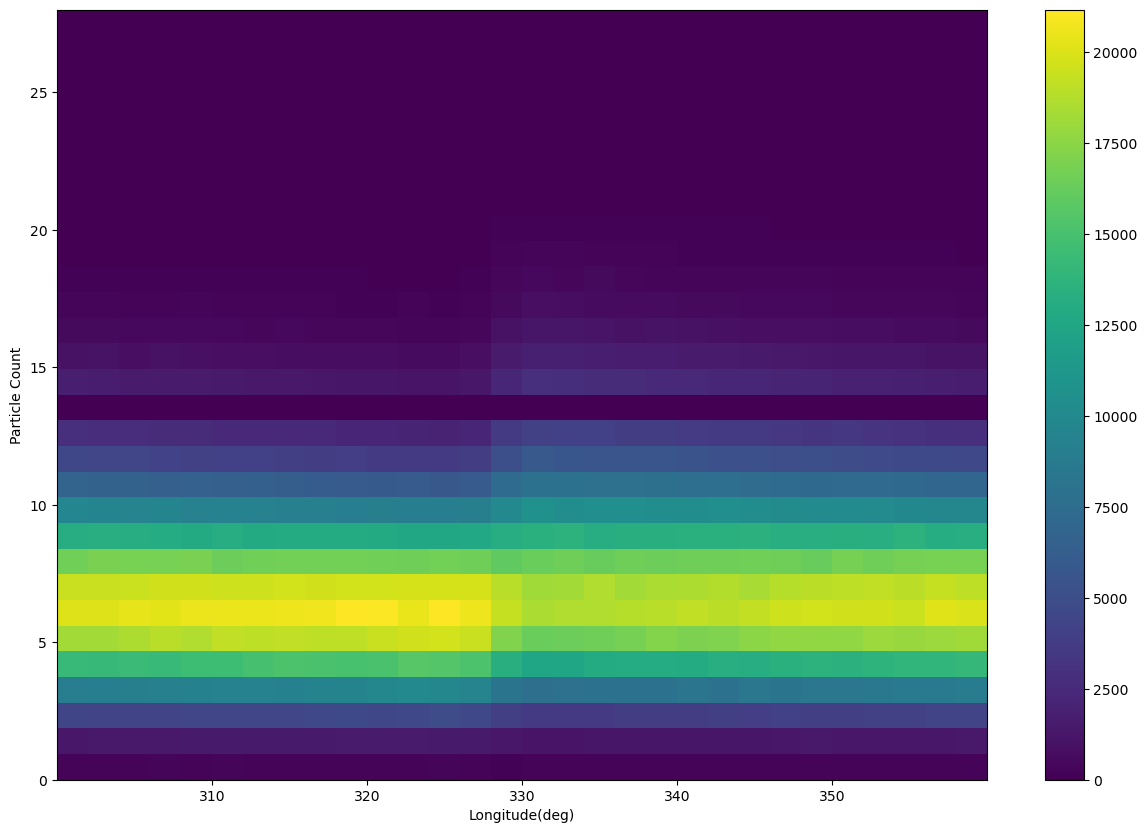

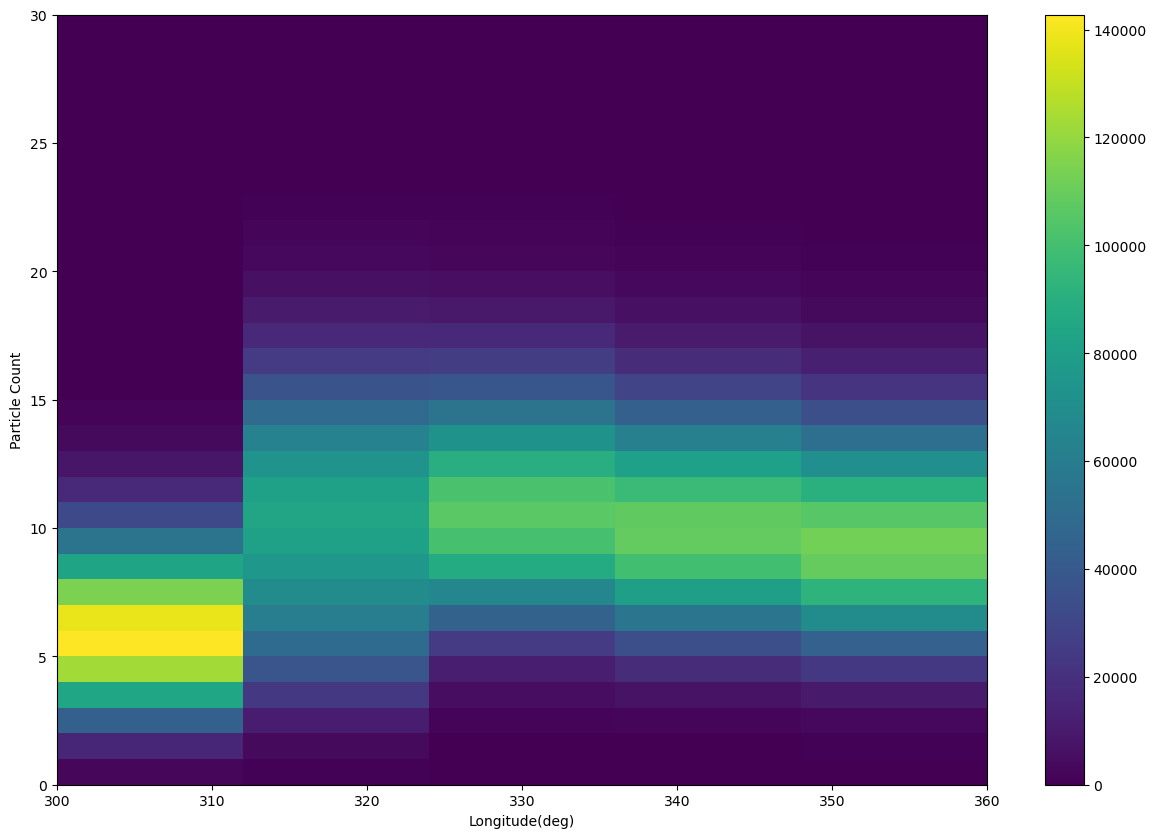

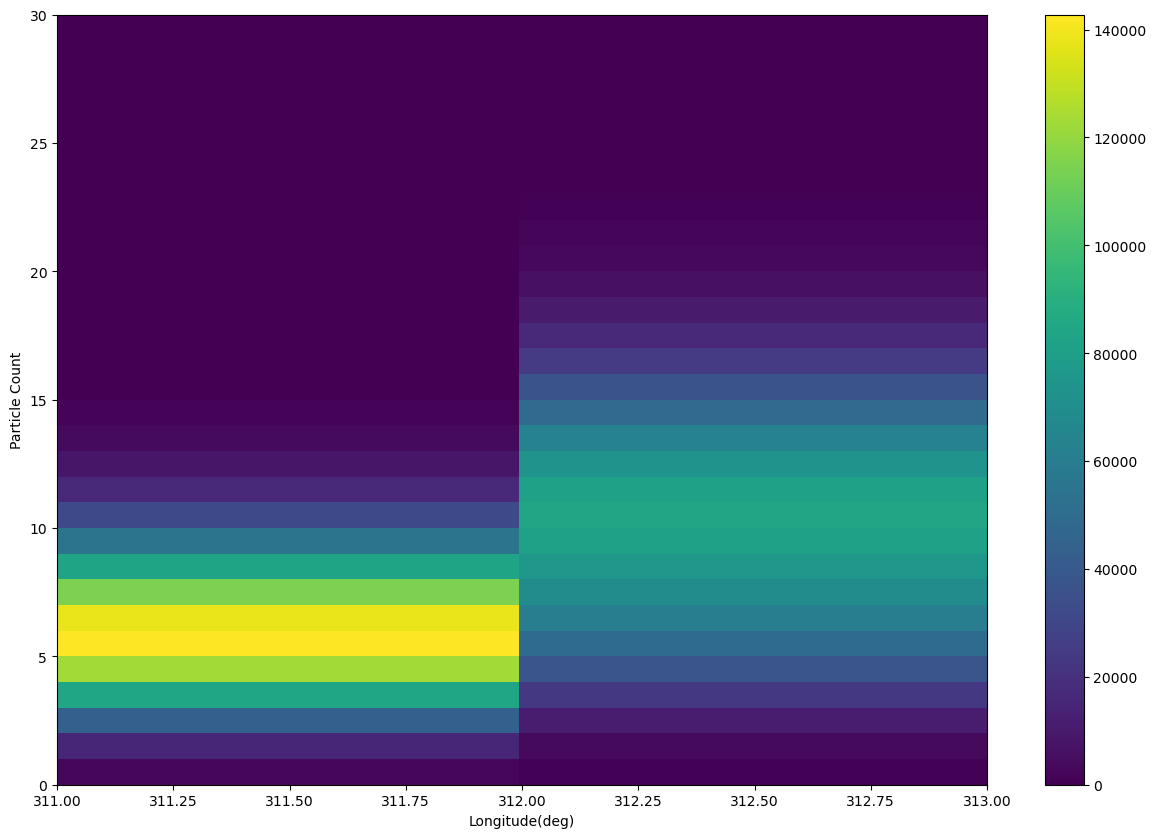

In [10]:
# fixing background
# we need to find the cut off point
test1 = longitude[longitude > 300]
print(len(test1))

plt.hist2d(test1, particle_count[len(particle_count)-len(test1):], bins=30)
plt.colorbar()
plt.xlabel('Longitude(deg)')
plt.ylabel('Particle Count')
plt.show()

plt.hist2d(longitude, particle_count, bins=30)
plt.colorbar()
plt.xlabel('Longitude(deg)')
plt.ylabel('Particle Count')
plt.xlim(300, 360)
plt.show()

plt.hist2d(longitude, particle_count, bins=30)
plt.colorbar()
plt.xlabel('Longitude(deg)')
plt.ylabel('Particle Count')
plt.title
plt.xlim(311, 313)
plt.show()

From the last plot above, it looks like the cut off point is 312 degrees. This means we take everything from 312 to 360 degrees out, shift everything to the left of 312 to the right by 48 degrees, and the data we just removed will become the first 48 degrees for our data.

(My lab partner mentioned that the cut off point is actually 315 degrees, when I ploted the 2D plot with this (45 degree shift) the plot looked much better) see below

b) The background is not consistent across the dataset. Find and describe as accurately how the background changes

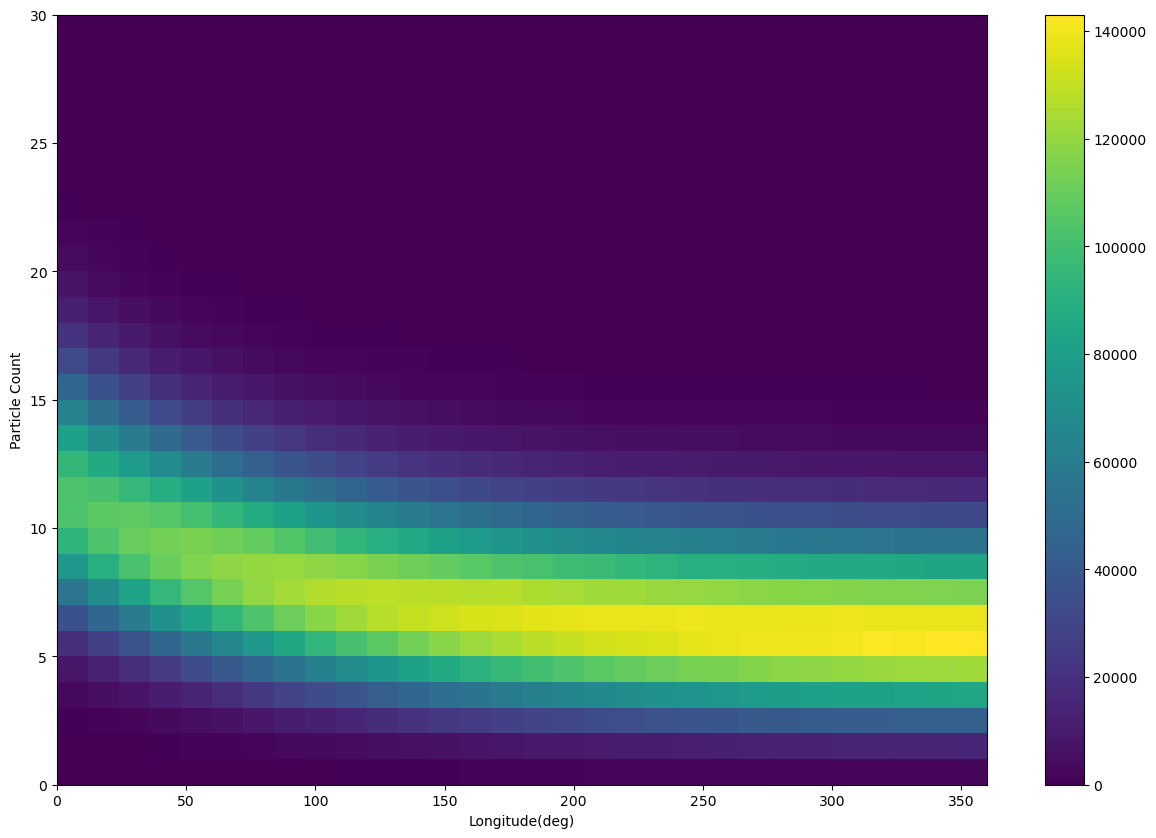

In [11]:
cutarray2 = [(x + 45) % 360  for x in longitude]


plt.hist2d(cutarray2, particle_count, bins=30)
plt.colorbar()
plt.xlabel('Longitude(deg)')
plt.ylabel('Particle Count')
plt.title
plt.show()

Looking at the plot above, the background seems to change in such a way the the particle count follows what looks like an expoential decay as a funtion of the longitude. I want to make sure that the change is in fact exponential by ploting in semilog scale, which I am having trouble doing in this 2D plot. AND ploting 

In [12]:
means = [0]*54000

for i in range(54000):
    means[i] = particle_count[i+40500::54000].mean()


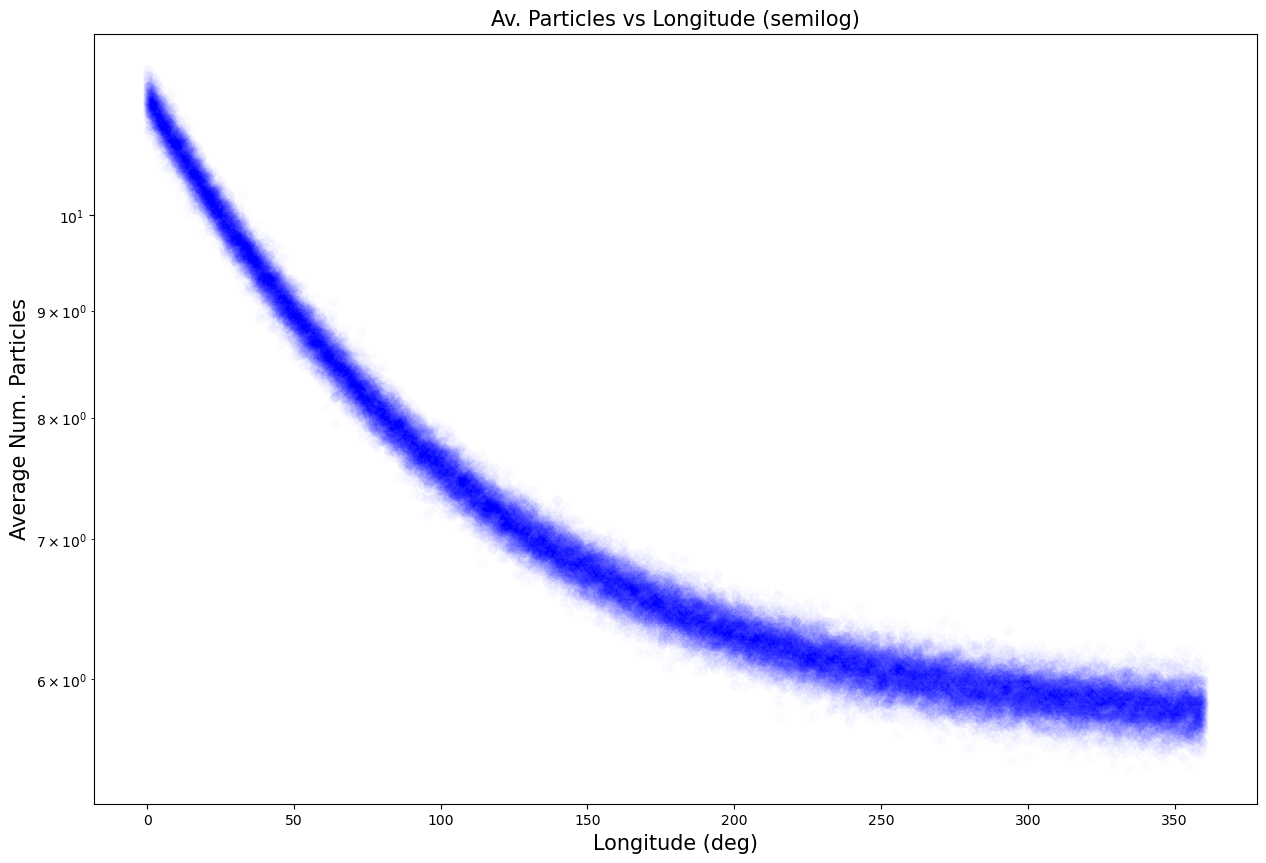

In [13]:
#plt.scatter(x = np.linspace(0,360,54000),y = means, alpha = 0.01, color='blue')
#plt.xlabel("Longitude (deg)", size = 15)
#plt.ylabel("Average Num. Particles", size = 15)
#plt.title('Av. Paritcles vs Longitude (deg)', size = 15)
#plt.show()

plt.scatter(x = np.linspace(0,360,54000),y = means, alpha = 0.01, color='blue')
plt.xlabel("Longitude (deg)", size = 15)
plt.yscale('log')
plt.ylabel("Average Num. Particles", size = 15)
plt.title('Av. Particles vs Longitude (semilog)', size = 15)
plt.show()

Great! now we know the change in our background can be be represented by an exponetial decay.

c) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

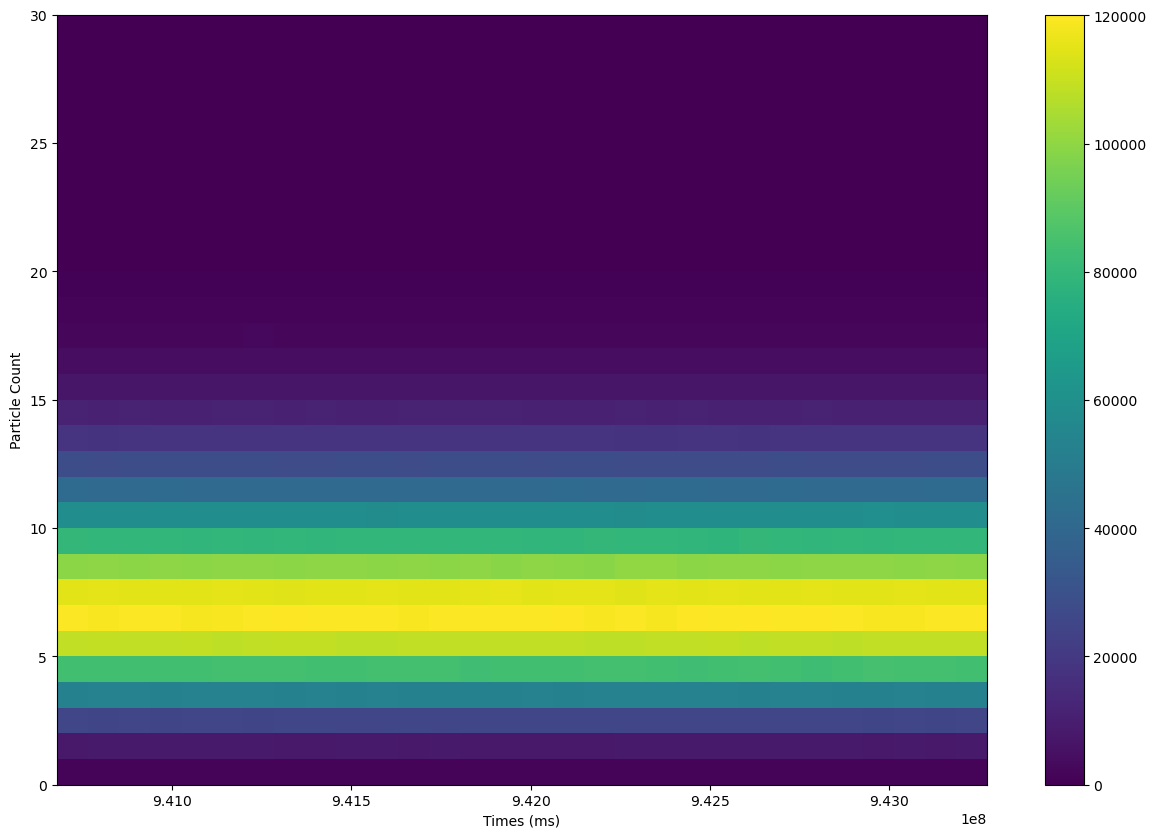

In [14]:
plt.hist2d(times, particle_count, bins=30)
plt.colorbar()
plt.xlabel('Times (ms)')
plt.ylabel('Particle Count')
plt.show()

The plot above doesn't give us much information about the relationship between time and particle count. We found previously that particle count is dependent on the longitude. So let's see what we can do.

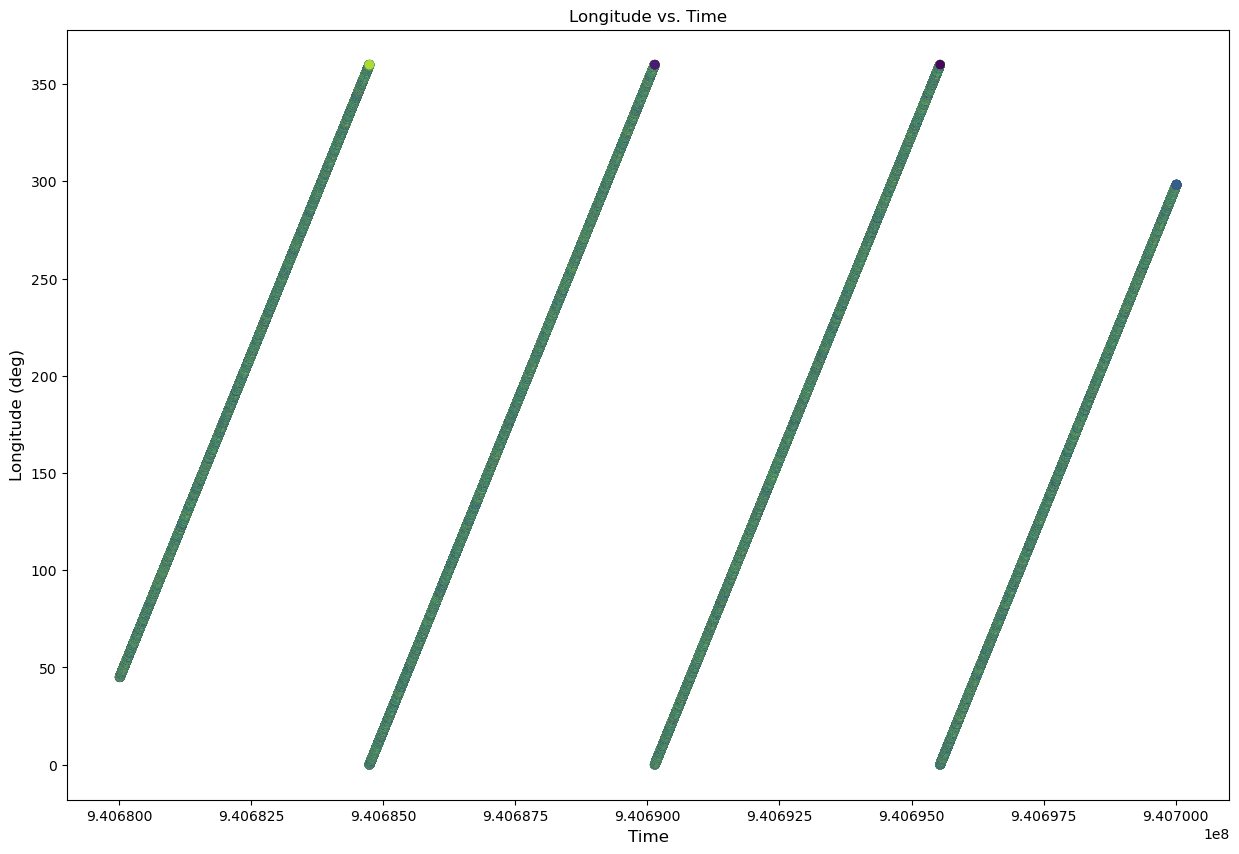

In [15]:
colors = np.random.rand(len(times[0:200000]))
plt.scatter(times[0:200000], longitude[0:200000], c=colors)
plt.xlabel('Time', size=12)
plt.ylabel('Longitude (deg)',size =12)
plt.title('Longitude vs. Time', size = 12)
plt.show()

As we can see, the longitude is periodic with time. Meaning longitude is dependent on time, and since the particle count is dependent on the longitude; we should be above to complete this task of modeling a background that includes time dependence.

We can begin by realizing that this period is 2$\pi$ or 360 degrees. The units of the longitude is in degrees, and the 2D plot we've made before goes form 0 to 360 degrees in the x-axis when we ploted particle count vs longitude (degrees). This means that, for every time interval that corresponds to a 2$\pi$ period, we have a background that resembles the shifted 2D plot. Taking what we've done in part b, we actually see that the our plot, both 2D and average versions, takes into account all the longitudal points from the data we've collected. The longitude vs time above shows that the longitude is depedent on time, we care particularly about the fact that longitude in periodic in time going form 0 to 360 degrees. We can use to to model the background with time dependence

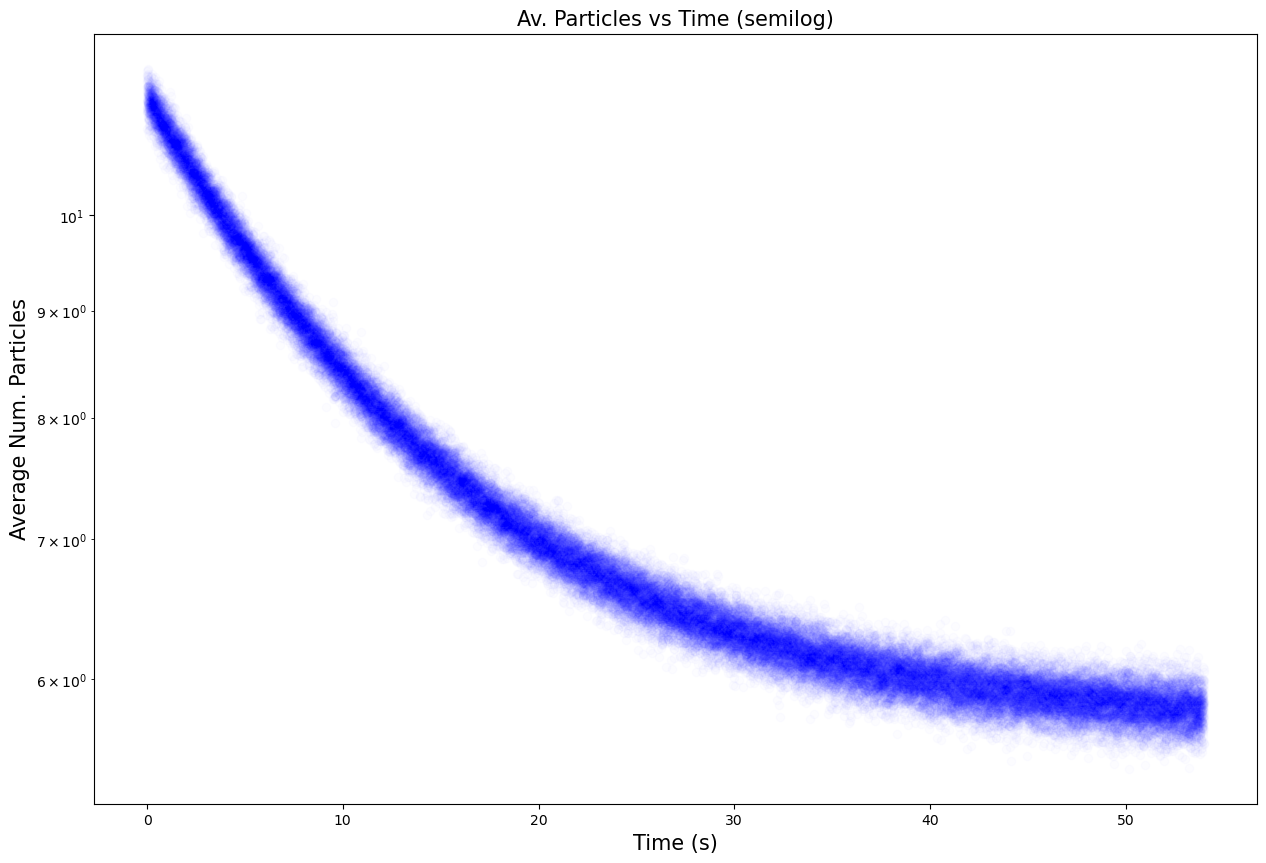

In [16]:
#plt.scatter(x = np.linspace(0,54,54000),y = means, alpha = 0.01, color='blue')
#plt.xlabel("Time (s)", size = 15)
#plt.ylabel("Average Num. Particles", size = 15)
#plt.title('Av. Paritcles vs Time', size = 15)
#plt.show()
plt.scatter(x = np.linspace(0,54,54000),y = means, alpha = 0.01, color='blue')
plt.xlabel("Time (s)", size = 15)
plt.yscale('log')
plt.ylabel("Average Num. Particles", size = 15)
plt.title('Av. Particles vs Time (semilog)', size = 15)
plt.show()

Looking at the two plots above, we see that as a function of time, average number of particles we see is also decreasing exponentially as time passes within each period as well.

NOW we want to looking at the background.

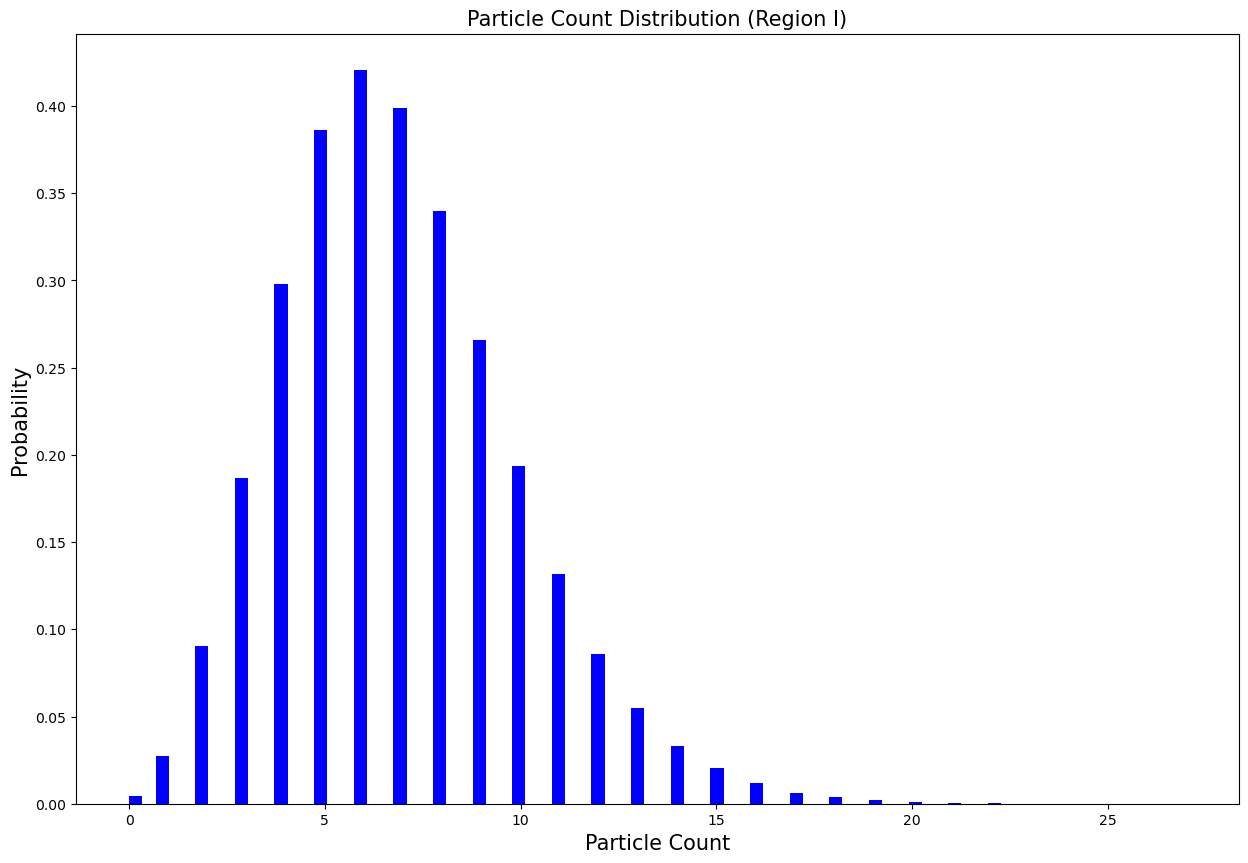

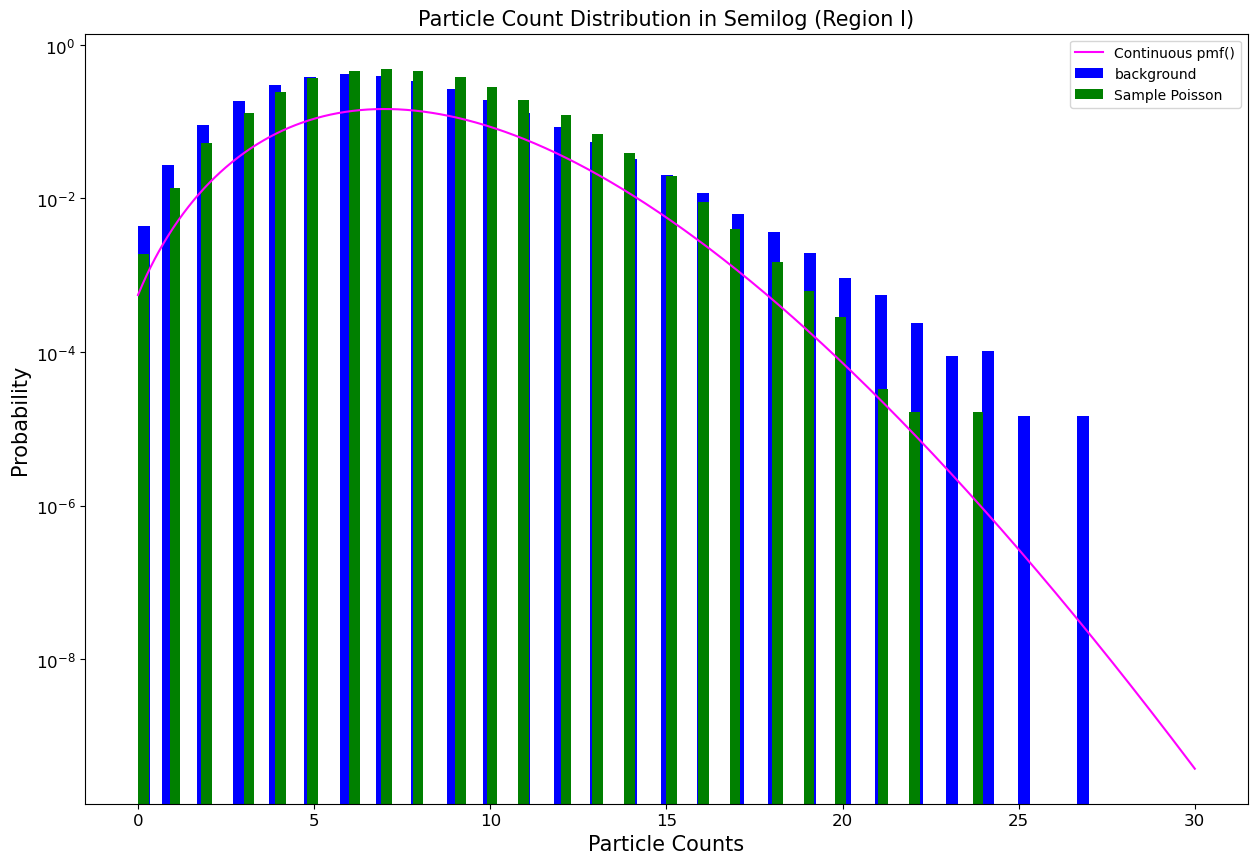

In [17]:
# Let's take a look at the first 200000 data points

plt.hist(particle_count[0:200000], bins = 80, density= True, color = 'blue')
plt.ylabel('Probability', size=15)
plt.xlabel('Particle Count', size=15)
plt.title('Particle Count Distribution (Region I)', size = 15)
plt.show()


fig, ax = plt.subplots(1, 1)

plt.yscale('log')
plt.ylabel('Probability', size=15)
plt.xlabel('Particle Counts', size=15)

mu = 7.5
def f(x):
   return np.exp(-mu)*(mu**x)/(scipy.special.factorial(x)) # Poisson distribution (the actual function)
x = np.linspace(0, 30, 1000)
ax.plot(x, f(x), color='magenta', label="Continuous pmf()")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


d = stats.poisson(7.5)
n = d.rvs(200000)

ax.hist(particle_count[0:200000], bins = 80, density=True, label='background',color='blue')
ax.hist(n, bins = 80, density=True, label='Sample Poisson', color='green')
plt.legend()
plt.title('Particle Count Distribution in Semilog (Region I)', size = 15)

plt.show()


As we can see from the plot above, by first glance (first plot) we might think it to be a poisson distribution, which would make sense given our context here, but because of the contamination mentioned earlier, our plot is not quite Poisson. This again is related to the shift we had to do in previous problems. We can procceed by dividing this shift that may have been caused by some misallignment into two regions. 

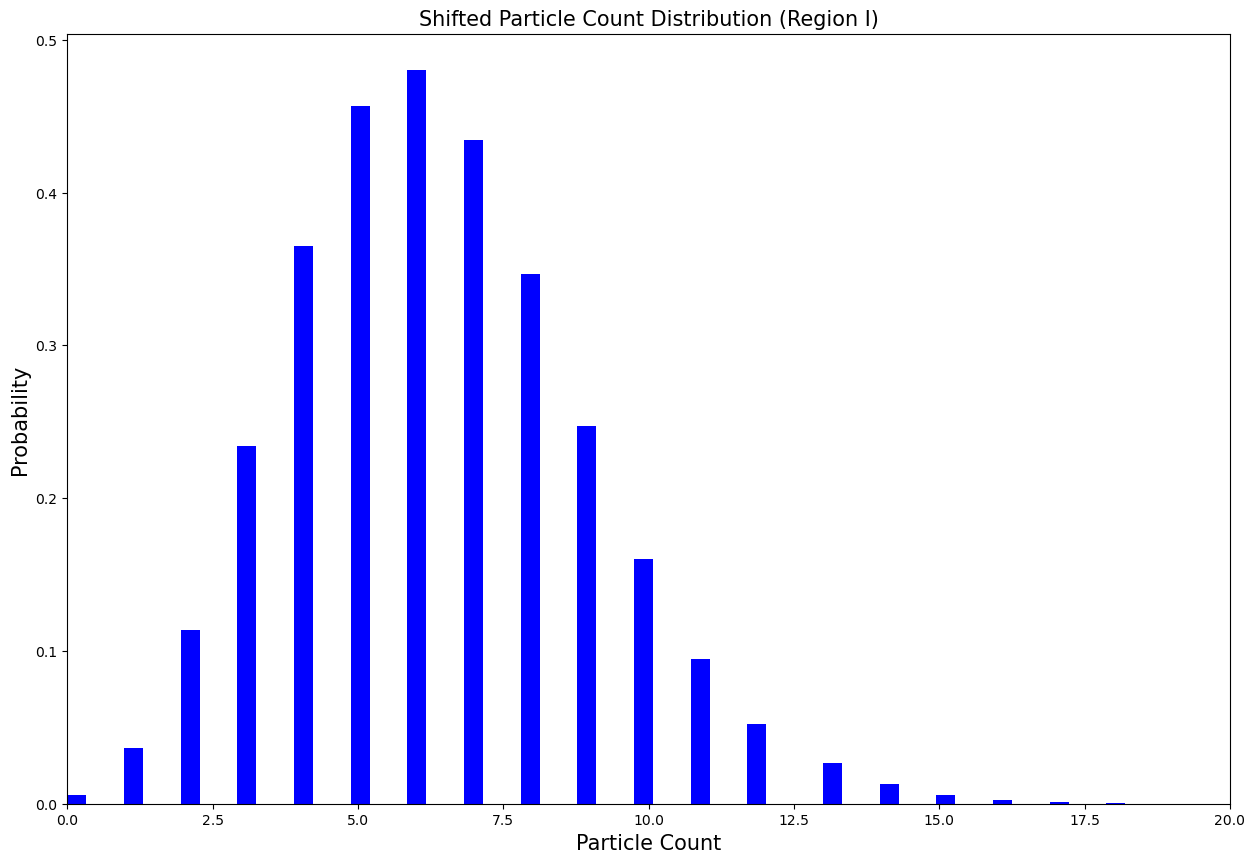

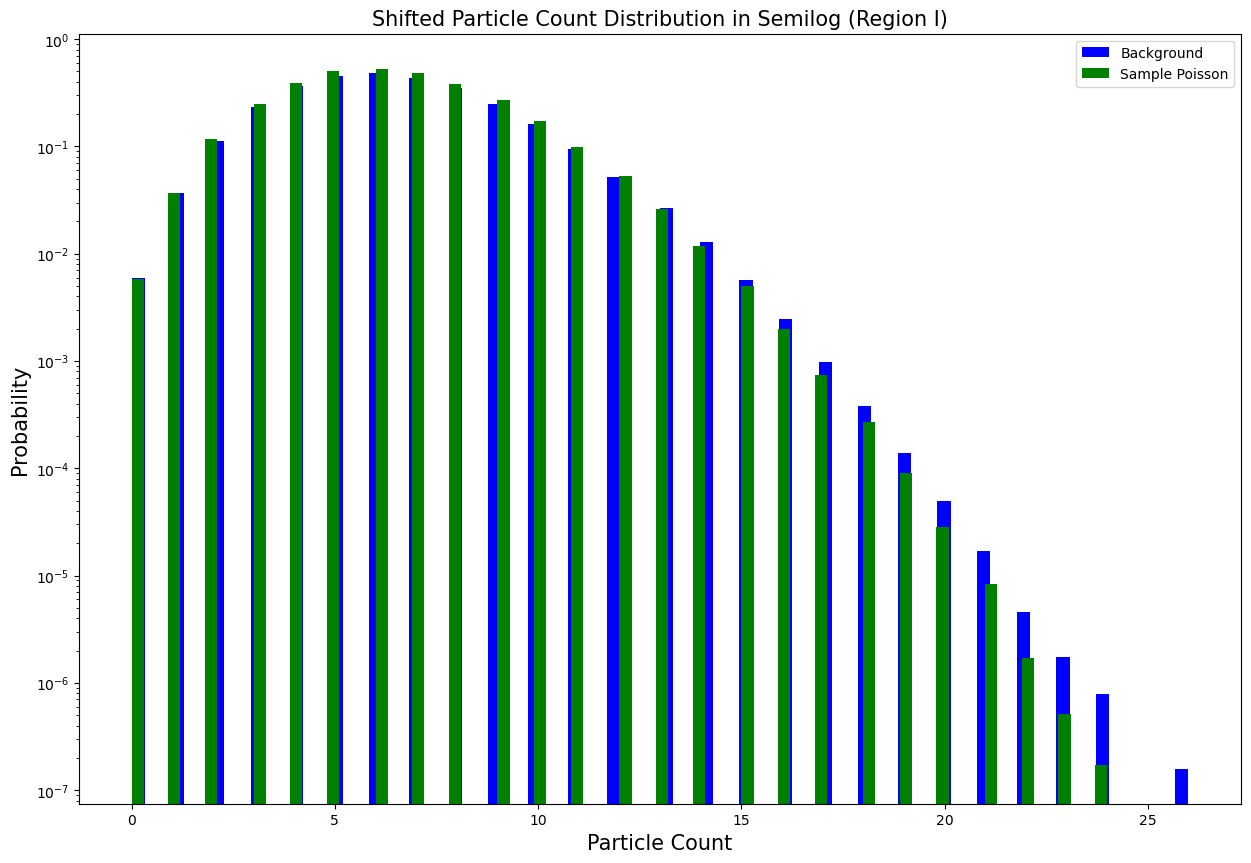

In [18]:
n = ((longitude > 45) & (longitude < 315))
t_region1 = times[n]
counts_region1 = particle_count[n]

mean_region1 = np.mean(counts_region1)

plt.hist(counts_region1, bins = 80, density= True, color = 'blue')
plt.ylabel('Probability', size=15)
plt.xlabel('Particle Count', size=15)
plt.title('Shifted Particle Count Distribution (Region I)', size = 15)
plt.xlim(0, 20)
plt.show()



fig, ax = plt.subplots(1, 1)
ax.hist(counts_region1, bins = 80, density= True, color = 'blue',label='Background')
plt.yscale('log')
plt.ylabel('Probability', size=15)
plt.xlabel('Particle Count', size=15)
plt.title('Shifted Particle Count Distribution in Semilog (Region I)', size = 15)


poiss = stats.poisson(mean_region1).rvs(len(counts_region1))
plt.hist(poiss, bins = 80, density= True, color = 'green',label='Sample Poisson')

plt.legend()

plt.show()

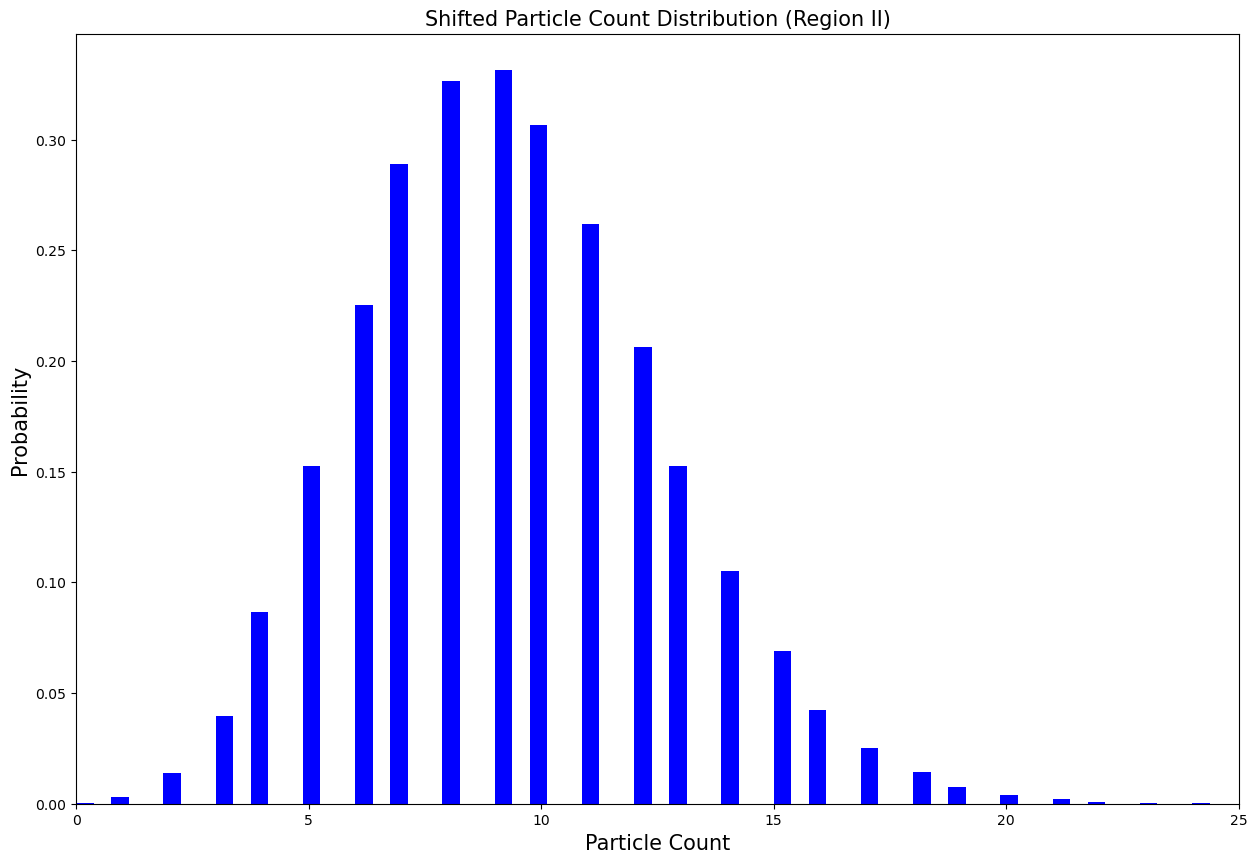

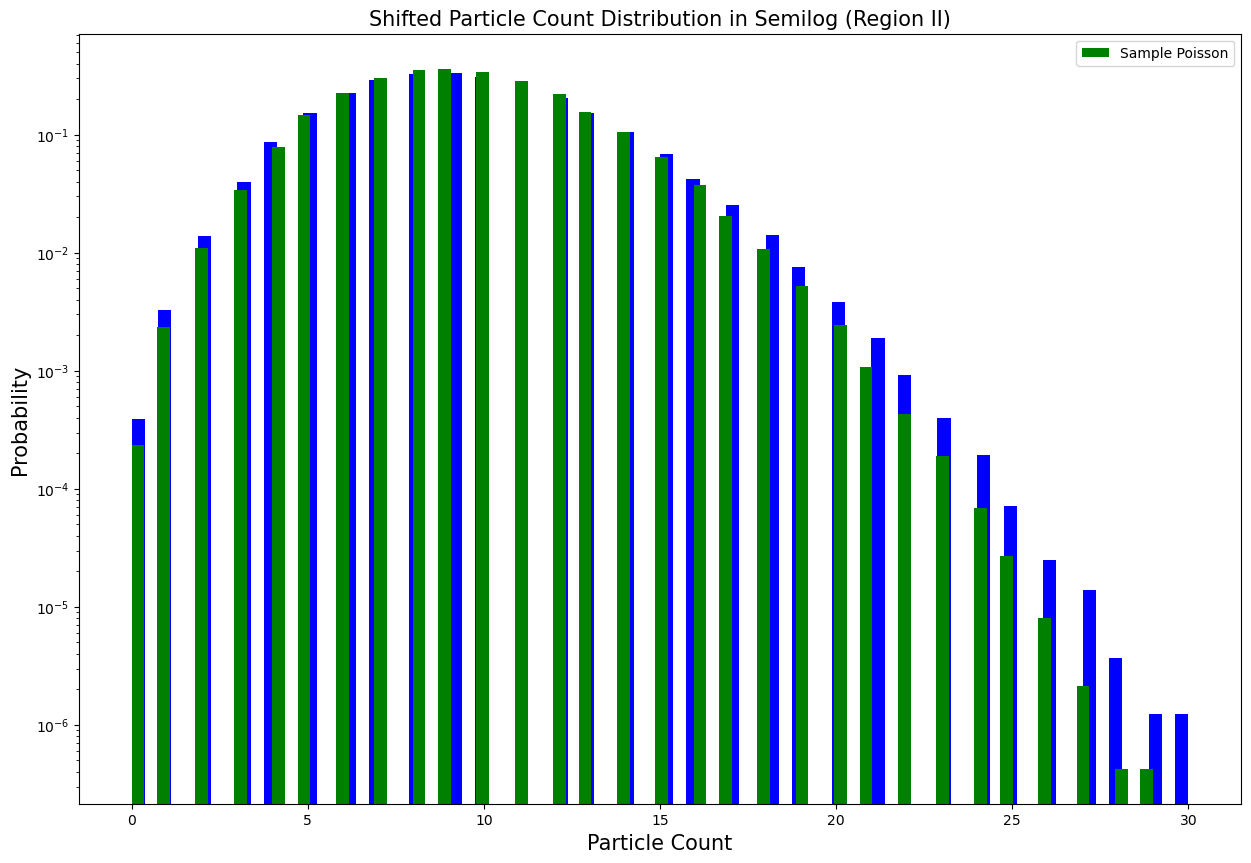

In [19]:
t_region2 = times[np.invert(n)]
counts_region2 = particle_count[np.invert(n)]
mean_region2 = np.mean(counts_region2)


plt.hist(counts_region2, bins = 80, density= True, color = 'blue',label='Background')
plt.ylabel('Probability', size=15)
plt.xlabel('Particle Count', size=15)
plt.title('Shifted Particle Count Distribution (Region II)', size = 15)
plt.xlim(0, 25)
plt.show()


plt.hist(counts_region2, bins = 80, density= True, color = 'blue')
plt.yscale('log')
plt.ylabel('Probability', size=15)
plt.xlabel('Particle Count', size=15)
plt.title('Shifted Particle Count Distribution in Semilog (Region II)', size = 15)

poiss = stats.poisson(mean_region2).rvs(len(counts_region2))
plt.hist(poiss, bins = 80, density= True, color = 'green',label='Sample Poisson')

plt.legend()
plt.show()

Now that we have split the data into two regions, we seem to not have anymore contaminations, and for the first 200,000 measuremnts, the background distribution is in fact a Poisson distribution. In both regions, the distribution is for every 100 millisecounds, which of course, is how often we take measurements.

d) 5$\sigma$ threshold for a 100 millisecond GRB at different times

In [20]:
# 5 sigma thresshold in region 1
round1 = mean_region1.round(1)
a = stats.norm.cdf(5) 
threshold_region1 = stats.poisson.ppf(a, round1)

print('5 Sigma Threshold for Region I: ' + str(threshold_region1))


5 Sigma Threshold for Region I: 23.0


In [21]:
# 5 sigma thresshold in region 2
round2 = mean_region2.round(1)
threshold_region2 = stats.poisson.ppf(a, round2)

print('5 Sigma Threshold for Region I: ' + str(threshold_region2))


5 Sigma Threshold for Region I: 28.0


# Problem 2

a) Downloading and loading data

In [22]:
hf2 = h5py.File('../images.h5', 'r')
print(hf2.keys())

<KeysViewHDF5 ['image1', 'imagestack']>


In [23]:
data = np.array(hf2.get('imagestack'))
print(data.shape)

(200, 200, 10)


b) Exploring data

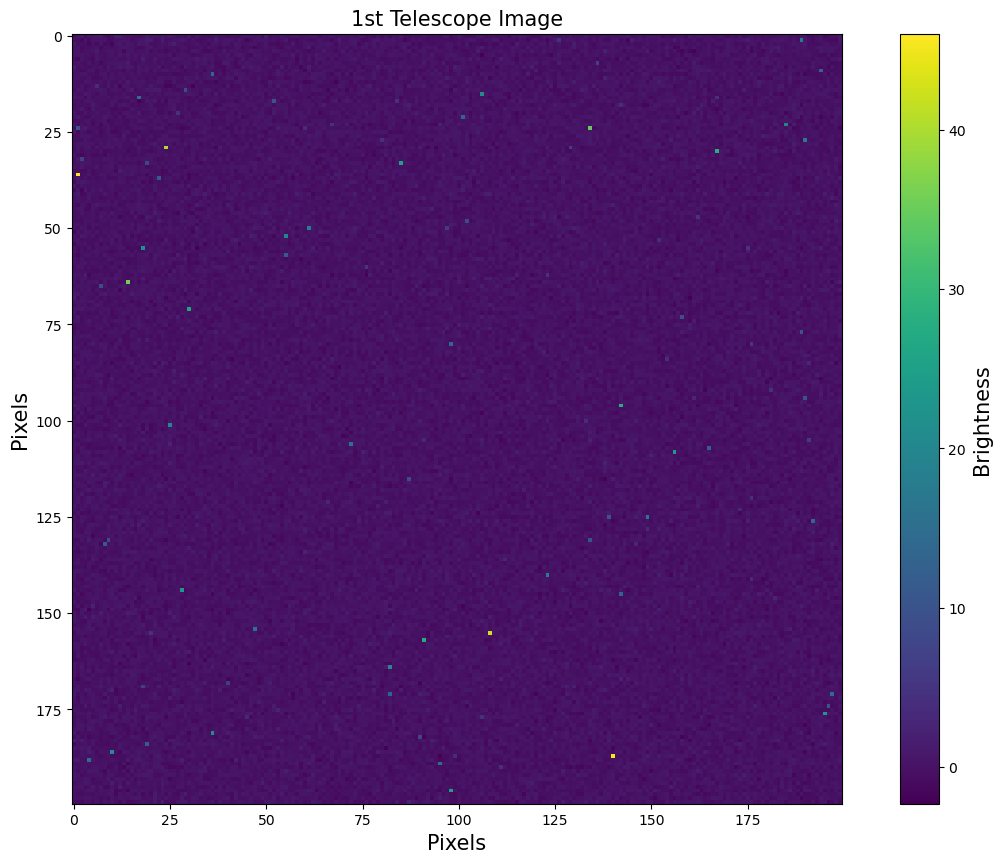

In [24]:
plt.imshow(data[:, :, 0])
plt.xlabel('Pixels', size = 15)
plt.ylabel('Pixels', size=15)
plt.title('1st Telescope Image', size =15)
plt.colorbar().set_label('Brightness', size = 15)
plt.show()


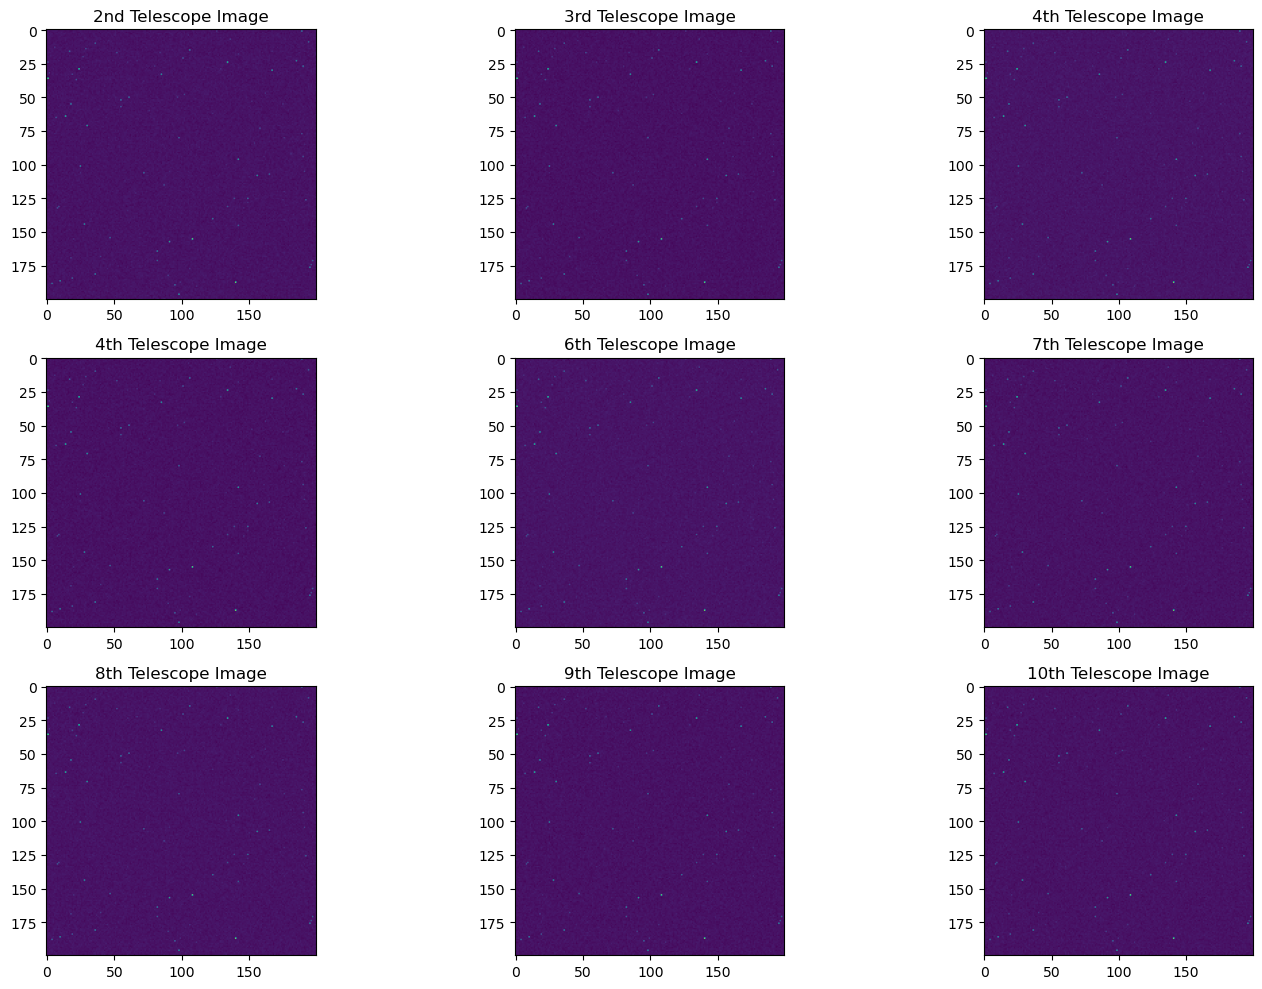

In [90]:
figure, axes = plt.subplots(nrows=3, ncols=3)

axes[0, 0].imshow(data[:, :, 1])
axes[0, 1].imshow(data[:, :, 2])
axes[0, 2].imshow(data[:, :, 3])

axes[1, 0].imshow(data[:, :, 4])
axes[1, 1].imshow(data[:, :, 5])
axes[1, 2].imshow(data[:, :, 6])

axes[2, 0].imshow(data[:, :, 7])
axes[2, 1].imshow(data[:, :, 8])
axes[2, 2].imshow(data[:, :, 9])

axes[0, 0].set_title('2nd Telescope Image')
axes[0, 1].set_title('3rd Telescope Image')
axes[0, 2].set_title('4th Telescope Image')
axes[1, 0].set_title('4th Telescope Image')
axes[1, 1].set_title('6th Telescope Image')
axes[1, 2].set_title('7th Telescope Image')
axes[2, 0].set_title('8th Telescope Image')
axes[2, 1].set_title('9th Telescope Image')
axes[2, 2].set_title('10th Telescope Image')

figure.tight_layout()

We are looking for the faintest stars, and well, looking at these 10 images, we can rely on the positions (pixels) in our images to spot the faint stars. However we can't determine this just by staring at the images, we must do more processing.

How should we go about this?
Well since we are looking for the faintest star, averaging the brightness of the stars over the time period that corresponds to the 10 images would allow us to find the position of these faint stars we are looking for.

In [55]:
pre_lim = np.ndarray(shape=(200,200))*0

In [56]:
for i in range(0, 10):
    for j in range(0,200):
        for k in range(0,200):
            pre_lim[j,k] += data[j,k,i]
            

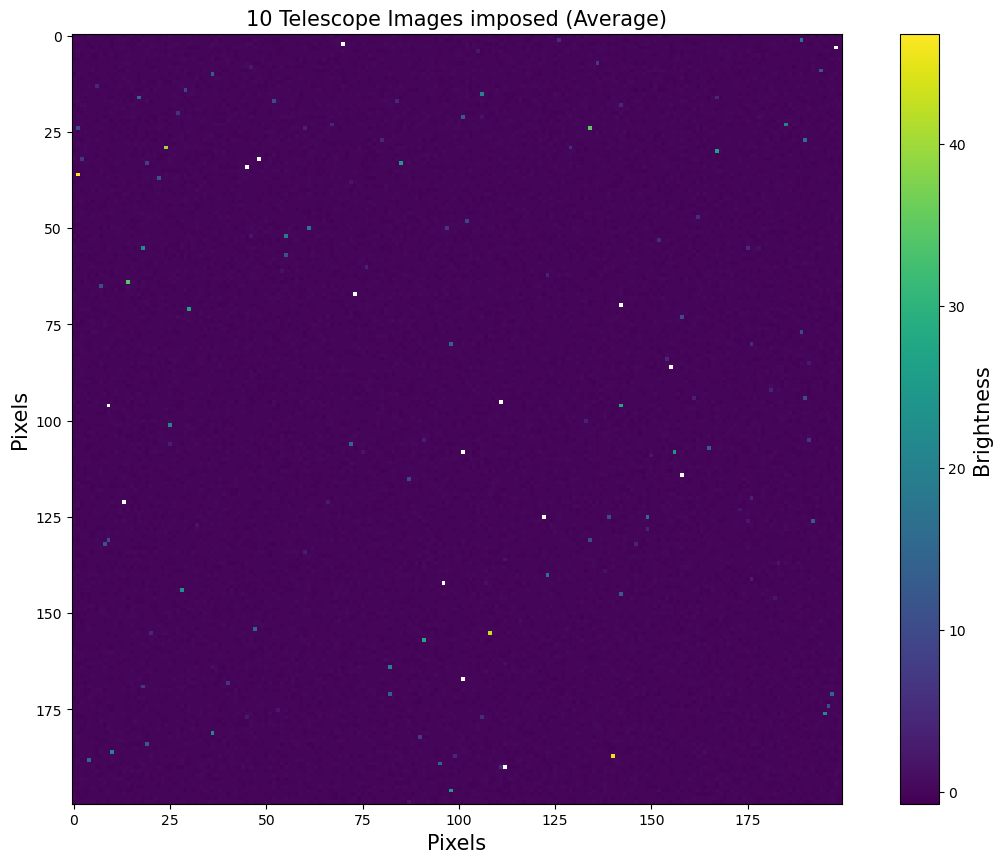

In [57]:
averaged_over_time = pre_lim/10
plt.imshow(averaged_over_time)
plt.xlabel('Pixels', size = 15)
plt.ylabel('Pixels', size=15)
plt.title('10 Telescope Images imposed (Average)', size =15)
plt.colorbar().set_label('Brightness', size = 15)
plt.show()

In [69]:
all_data_average = np.reshape(averaged_over_time, 200*200)

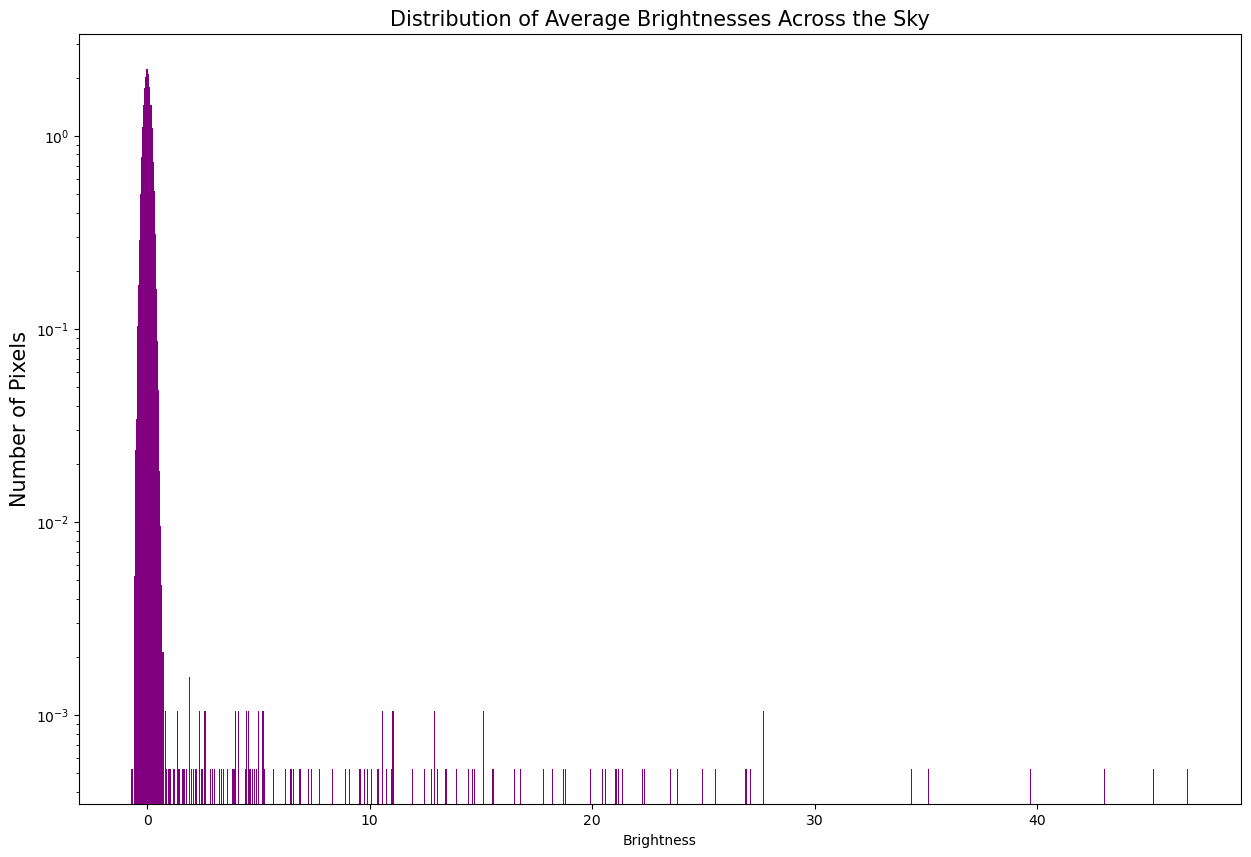

In [89]:
plt.hist(all_data_average, bins = 1000, density= True, color ='purple')
plt.title('Distribution of Average Brightnesses Across the Sky',size=15)
plt.xlabel('Brightness')
plt.ylabel('Number of Pixels',size=15)
plt.semilogy()
plt.show()

From the plot above, it looks like the background is a Gausian distribution.

c) Using your background distribution, hunt for your signal (faint stars). Describe what you find.

Looking at the distribution, it is clear (for example) at brightnesses greater than 